## ΤΕΙ Ηπείρου - Τμήμα Μηχανικών Πληροφορικής ΤΕ 
### Παραδείγματα από το μάθημα (12/10/2016) Μαθηματικά για μηχανικούς  

### Oρίζουσα πίνακα $2 \times 2$, αντίστροφος πίνακα 

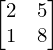

'Η ορίζουσα είναι 11'

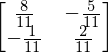

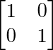

In [10]:
from sympy import *
from IPython.display import display
init_printing()
A= Matrix([[2,5],[1,8]])
display(A)
display('Η ορίζουσα είναι %s' % A.det())
display(A.inv()) # αντίστροφος του Α
A*A.inv() # το γινόμενο του Α και του αντιστρόφου του δίνει τον μοναδιαίο πίνακα

### Μη αντιστρέψιμος πίνακας

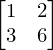

η ορίζουσα είναι 0


In [15]:
A = Matrix([[1,2], [3,6]])
display(A)
print('η ορίζουσα είναι', A.det())
# A.inv()  --> ValueError: Matrix det == 0; not invertible.

### Δίνονται δύο πίνακες Α και Β. Να λυθεί η εξίσωση ΑΧ=Β χρησιμοποιώντας τον αντίστροφο του Α

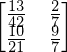

In [16]:
A = Matrix([[2,5],[8,-1]])
B = Matrix([[3,7],[2,1]])
X = A.inv()*B
X

### Ορίζουσες πινάκων διάστασης μεγαλύτερης του $2 \times 2$

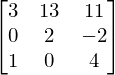

In [5]:

A=Matrix([[3,13,11],[0,2,-2],[1,0,4]])
display(A)
display(A.det())

#### Ορίζουσες ειδικών περιπτώσεων πινάκων

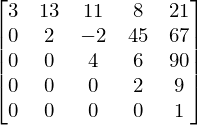

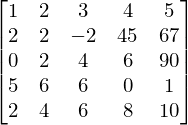

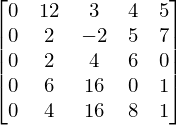

In [6]:
# άνω τριγωνικός (γινόμενο στοιχείων διαγωνίου)
A=Matrix([[3,13,11,8,21],[0,2,-2,45,67],[0,0,4,6,90],[0,0,0,2,9],[0,0,0,0,1]])
display(A)
display(A.det())
# ανάλογες στήλες ή γραμμές (1η και 5η γραμμή)
B=Matrix([[1,2,3,4,5],[2,2,-2,45,67],[0,2,4,6,90],[5,6,6,0,1],[2,4,6,8,10]])
display(B)
display(B.det())
# μηδενική στήλη ή γραμμή (1η στήλη)
C=Matrix([[0,12,3,4,5],[0,2,-2,5,7],[0,2,4,6,0],[0,6,16,0,1],[0,4,16,8,1]])
display(C)
display(C.det())

### Αντιστροφή πίνακα με χρήση του συμπληρωματικού (προσαρτημένου) πίνακα

In [8]:
from IPython.display import Latex 
A = Matrix([[1,2,3],[0,4,5],[1,0,6]])
B = A.adjugate().transpose()
C = A.adjugate()
D = 1 / det(A) * A.adjugate()
E = A.inv()
display(Latex('$A=%s$' % latex(A)))
display(Latex('Πίνακας αλγεβρικών συμπληρωμάτων (cofactor matrix) $%s$' % latex(B)))
display(Latex('Συμπληρωματικός πίνακας (adjugate) $%s$' % latex(C)))
display(Latex('|A|=%s' % det(A)))
display(Latex('$A^{-1}=%s$' % latex(D)))
display(Latex('$A^{-1}=%s$' % latex(E))) 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Επίλυση συστήματος εξισώσεων 3x3 με τη χρήση αντίστροφου πίνακα
$$x+2y+3z=1$$
$$y+4z=2$$
$$5x+6y=6$$

In [9]:
A=Matrix([[1,2,3],[0,1,4],[5,6,0]])
B=Matrix([1,2,6])
X=A.inv()*B
display(Latex('$A=%s$' % latex(A)))
display(Latex('$B=%s$' % latex(B)))
display(Latex('$A^{-1}=%s$' % latex(A.inv())))
display(Latex('$X=%s$' % latex(X)))
if A*X==B:
    print('Επιβεβαίωση AX=B')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Επιβεβαίωση AX=B


### Επίλυση συστήματος εξισώσεων 3x3 με τη μέθοδο του Cramer
$$x+2y+3z=1$$
$$y+4z=2$$
$$5x+6y=6$$

In [10]:
A=Matrix([[1,2,3],[0,1,4],[5,6,0]])
B=Matrix([1,2,6])
Dx=A[:,:] # αντιγραφή του πίνακα Α στο Dx
Dx.col_op(0,lambda v,i:B[i])
Dy=A[:,:]
Dy.col_op(1,lambda v,i:B[i])
Dz=A[:,:]
Dz.col_op(2,lambda v,i:B[i])
x = Dx.det()/A.det()
y = Dy.det()/A.det()
z = Dz.det()/A.det()
display(Latex('$A=%s$ |A|=%.1f' % (latex(A), A.det())))
display(Latex('$B=%s$' % latex(B))) 
display(Latex('$D_x=%s$ |Dx|=%.1f' % (latex(Dx), Dx.det())))
display(Latex('$D_y=%s$ |Dy|=%.1f' % (latex(Dy), Dy.det())))
display(Latex('$D_z=%s$ |Dz|=%.1f' % (latex(Dz), Dz.det())))
display(Latex('Λύση $x=%s, y=%s, z=%s$' % (x,y,z)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>